PWFA Data Reader For OSIRIS Open Source (version 1.0)

This notebook produces test outputs for the PWFA examples in the first version of the Open Source OSIRIS.  

In the example below, I assumed that you are running these tests on Cori, and the 3 cases are running on

injection-test

rz-focus

3d-focus

respectively.  

To run the script below, you need to import the pyVisOS library to import the OSIRIS data.  That can be found in the repo below:

https://github.com/UCLA-Plasma-Simulation-Group/pyVisOS

Everything else is self-explanatory (I hope).  If you have questions please contact me @ 

tsung@physics.ucla.edu


Frank Tsung, January 2023



In [1]:
import sys

#
# Here we import Han Wen's pyVisOS package
#
sys.path.append('/global/homes/t/tsung/pyVisOS-master/')
#
#
#



import matplotlib

%matplotlib inline
import numpy as np
import sys
import ipywidgets

import osh5io
import osh5def
import osh5vis
import osh5utils
import matplotlib.pyplot as plt
import osh5visipy
from ipywidgets import interact_manual,Layout,interact, FloatSlider,interact,fixed
import ipywidgets as widgets

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

import matplotlib.pyplot as plt

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



Importing osh5visipy. Please use `%matplotlib notebook' in your jupyter/ipython notebook;
use `%matplotlib widget' if you are using newer version of matplotlib (3.0) + jupyterlab (0.35)


The simplest case is the 2D focusing case, you can run that on your laptop.  To diagnose this case run the following 2 cells.  The first cell defines the simple function and the 2nd cell takes 2 snapshots of the simulation


In [20]:
import math

def file_name_field(path,field,file_no):
    filename=path+'/FLD/'+field+'/'+field+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)
    
 
def file_name_phase(path,field,species,file_no):
    filename=path+'/PHA/'+field+'/'+species+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)

def file_name_density(path,field,species,file_no):
    filename=path+'/DENSITY/'+species+'/'+field+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)


def pwfa_rz_basic(rundir,file_no,show=False,*args,**kwpassthrough):
    #
    #
        plasma_field_name = 'e1'
        laser_field_name = 'e2'
    #
    #
        species_1_name = 'driver'


        electron_phase = file_name_phase(rundir,'p1x1',species_1_name,file_no)
        # electron_dist = file_name_phase(rundir,'p1p2',species_1_name,file_no)
        
        
        # ion_phase = file_name_phase(rundir,'p1x1',species_2_name,file_no)
        # ion_dist = file_name_phase(rundir,'p1p2',species_2_name,file_no)
        # ion_p2x1 = file_name_phase(rundir,'p2x1',species_2_name,file_no)
        
        
        # ion_density = file_name_density(rundir,'charge',species_2_name,file_no)
        electron_density = file_name_density(rundir,'charge',species_1_name,file_no)
        # ion_density_init = file_name_density(rundir,'charge',species_2_name,0)
        
        
        # b1=file_name_field(rundir,'b1',file_no)
        # b2=file_name_field(rundir,'b2',file_no)
        # b3=file_name_field(rundir,'b3',file_no)
        
        # b1_data=osh5io.read_h5(b1)
        # b2_data=osh5io.read_h5(b2)
        # b3_data=osh5io.read_h5(b3)
        
        # bsq=b1
        # bsq=(b1_data*b1_data+b2_data*b2_data+b3_data*b3_data)

        e1=file_name_field(rundir,'e1',file_no)
        e1_data=osh5io.read_h5(e1)
        
        # electron_p1x1 = osh5io.read_h5(electron_phase)
        # electron_p1p2 = osh5io.read_h5(electron_dist)
        electron_rho = osh5io.read_h5(electron_density)
        
        # ion_p1x1 = osh5io.read_h5(ion_phase)
        # ion_p1p2 = osh5io.read_h5(ion_dist)
        # ion_phase_perp = osh5io.read_h5(ion_p2x1)
        
        # rho_i = osh5io.read_h5(ion_density)
        # rho_i_0 = osh5io.read_h5(ion_density_init)
   
        
      

        fig = plt.figure(figsize=(10,5) )
    
        electron_phase_plot = plt.subplot(121)
        # electron_p1x1=np.abs(electron_p1x1)
        # data_max=electron_p1x1.max()
        # osh5vis.osplot(electron_p1x1, title='Electron Phase Space (x1,p1)', *args,**kwpassthrough,
        #                norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000))
        electron_rho=np.abs(electron_rho)
        data_max=electron_rho.max()
        if(math.isnan(data_max)): data_max = 1.0
        
        osh5vis.osplot(np.abs(electron_rho),title='Electron Density (x1,x2)',*args,**kwpassthrough,norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000),cmap='OrRd')
        # osh5vis.osplot(np.abs(electron_rho[0,:]),title='Electron Density (x1,x2)',*args,**kwpassthrough,ylim=[-1,0.2])

        
        electron_dist_plot = plt.subplot(122)
        
        
        osh5vis.osplot(e1_data, title='E1', *args,**kwpassthrough,cmap='rainbow')
        
        if(show == True):
            plt.tight_layout()
            plt.show()
        else:
            print('saving file')
            fig.savefig(rundir+'/movie-'+repr(file_no).zfill(6)+'.png')
            plt.close(fig)
#


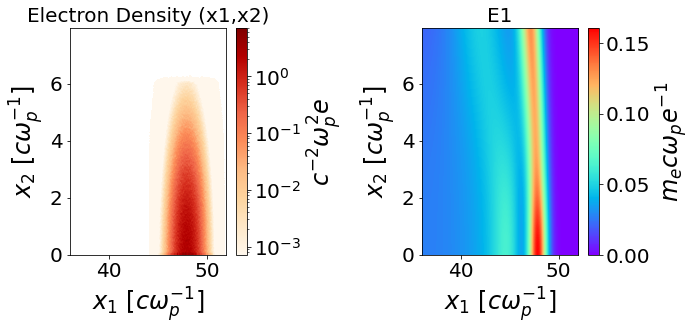

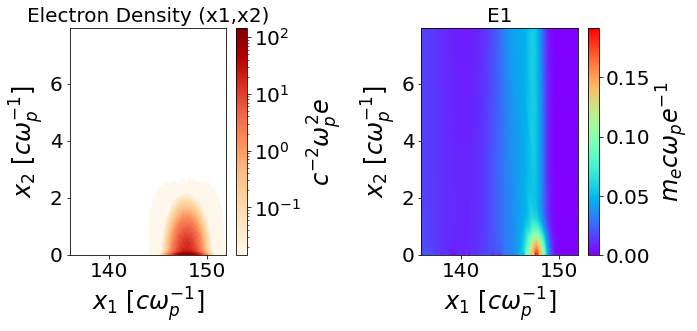

In [22]:
# here we takes 2 snapshots of the simulation.  You can either reproduce the plot before or
# look at some other times
pwfa_rz_basic('/global/cscratch1/sd/tsung/focus-rz/MS/',5,show=True)
pwfa_rz_basic('/global/cscratch1/sd/tsung/focus-rz/MS/',15,show=True)


In [11]:
import math

def file_name_field(path,field,file_no):
    filename=path+'/FLD/'+field+'/'+field+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)
 
def file_name_field_slice(path,field,file_no,dir_name,slice_no):
    filename=path+'/FLD/'+field+'/'+field+'-'+dir_name+'-'+repr(slice_no).zfill(2)+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)
 
def file_name_phase(path,field,species,file_no):
    filename=path+'/PHA/'+field+'/'+species+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)

def file_name_density(path,field,species,file_no):
    filename=path+'/DENSITY/'+species+'/'+field+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)

def file_name_density_slice(path,field,species,dir_name,slice_no,file_no):
    filename=path+'/DENSITY/'+species+'/'+field+'/'+field+'-'+species+'-'+dir_name+'-'+repr(slice_no).zfill(2)+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)


def pwfa_3d_basic(rundir,file_no,show=False,*args,**kwpassthrough):
    #
    #
        plasma_field_name = 'e1'
        laser_field_name = 'e2'
    #
    #
        species_1_name = 'driver'


        electron_phase = file_name_phase(rundir,'p1x1',species_1_name,file_no)
        # electron_dist = file_name_phase(rundir,'p1p2',species_1_name,file_no)
        
        
        # ion_phase = file_name_phase(rundir,'p1x1',species_2_name,file_no)
        # ion_dist = file_name_phase(rundir,'p1p2',species_2_name,file_no)
        # ion_p2x1 = file_name_phase(rundir,'p2x1',species_2_name,file_no)
        
        
        # ion_density = file_name_density(rundir,'charge',species_2_name,file_no)
        electron_density = file_name_density_slice(rundir,'charge-slice',species_1_name,'x3',1,file_no)
        electron_density_2 = file_name_density_slice(rundir,'charge-slice',species_1_name,'x2',1,file_no)

        # ion_density_init = file_name_density(rundir,'charge',species_2_name,0)
        
        
        # b1=file_name_field(rundir,'b1',file_no)
        # b2=file_name_field(rundir,'b2',file_no)
        # b3=file_name_field(rundir,'b3',file_no)
        
        # b1_data=osh5io.read_h5(b1)
        # b2_data=osh5io.read_h5(b2)
        # b3_data=osh5io.read_h5(b3)
        
        # bsq=b1
        # bsq=(b1_data*b1_data+b2_data*b2_data+b3_data*b3_data)
        e1=file_name_field_slice(rundir,'e1-slice',file_no,'x3',1)
        e1_2=file_name_field_slice(rundir,'e1-slice',file_no,'x2',1)

        e1_data=osh5io.read_h5(e1)
        e1_data_2 = osh5io.read_h5(e1_2)
        
        # electron_p1x1 = osh5io.read_h5(electron_phase)
        # electron_p1p2 = osh5io.read_h5(electron_dist)
        electron_rho = osh5io.read_h5(electron_density)
        electron_rho_2 = osh5io.read_h5(electron_density_2)
        
        # ion_p1x1 = osh5io.read_h5(ion_phase)
        # ion_p1p2 = osh5io.read_h5(ion_dist)
        # ion_phase_perp = osh5io.read_h5(ion_p2x1)
        
        # rho_i = osh5io.read_h5(ion_density)
        # rho_i_0 = osh5io.read_h5(ion_density_init)
   
        
      

        fig = plt.figure(figsize=(10,10) )
        fig.suptitle('3D asymmetric focusing example,  Time = '+repr(electron_rho.run_attrs['TIME'][0]) )

        electron_phase_plot = plt.subplot(221)
        # electron_p1x1=np.abs(electron_p1x1)
        # data_max=electron_p1x1.max()
        # osh5vis.osplot(electron_p1x1, title='Electron Phase Space (x1,p1)', *args,**kwpassthrough,
        #                norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000))
        electron_rho=np.abs(electron_rho)
        data_max=electron_rho.max()
        if(math.isnan(data_max)): data_max = 1.0
        print(data_max)
        osh5vis.osplot(np.abs(electron_rho),title='Electron Density (x1,x2)',*args,**kwpassthrough,norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000),cmap='OrRd')
        # osh5vis.osplot(np.abs(electron_rho[0,:]),title='Electron Density (x1,x2)',*args,**kwpassthrough,ylim=[-1,0.2])

        
        electron_dist_plot = plt.subplot(222)
        
        
        osh5vis.osplot(e1_data, title='E1', *args,**kwpassthrough,cmap='nipy_spectral')
        
        electron_phase_plot_2 = plt.subplot(223)
        # electron_p1x1=np.abs(electron_p1x1)
        # data_max=electron_p1x1.max()
        # osh5vis.osplot(electron_p1x1, title='Electron Phase Space (x1,p1)', *args,**kwpassthrough,
        #                norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000))
        electron_rho_2=np.abs(electron_rho_2)
        data_max=electron_rho_2.max()
        if(math.isnan(data_max)): data_max = 1.0
        print(data_max)
        osh5vis.osplot(np.abs(electron_rho_2),title='Electron Density (x1,x3)',*args,**kwpassthrough,norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000),cmap='OrRd')
        # osh5vis.osplot(np.abs(electron_rho[0,:]),title='Electron Density (x1,x2)',*args,**kwpassthrough,ylim=[-1,0.2])

        
        electron_dist_plot_2 = plt.subplot(224)
        
        
        osh5vis.osplot(e1_data_2, title='E1, x2 slice', *args,**kwpassthrough,cmap='nipy_spectral')
        
        if(show == True):
            plt.tight_layout()
            plt.show()
        else:
            print('saving file')
            fig.savefig(rundir+'/movie-'+repr(file_no).zfill(6)+'.png')
            plt.close(fig)
#


25.76968
26.055824


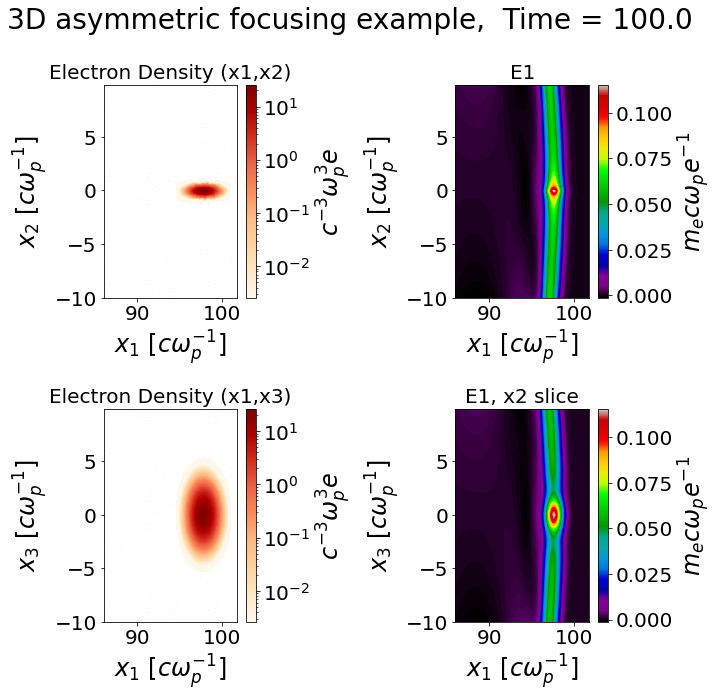

27.353683
28.432537


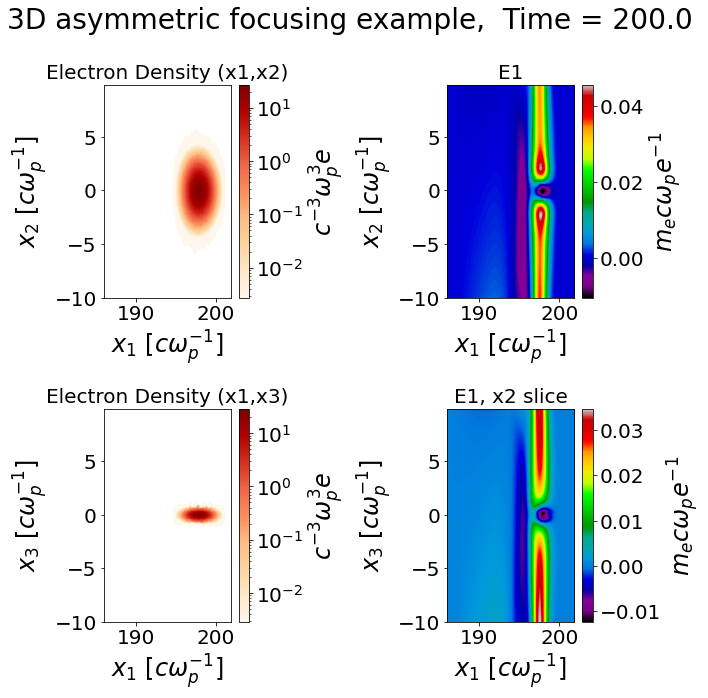

3.618458
3.976991


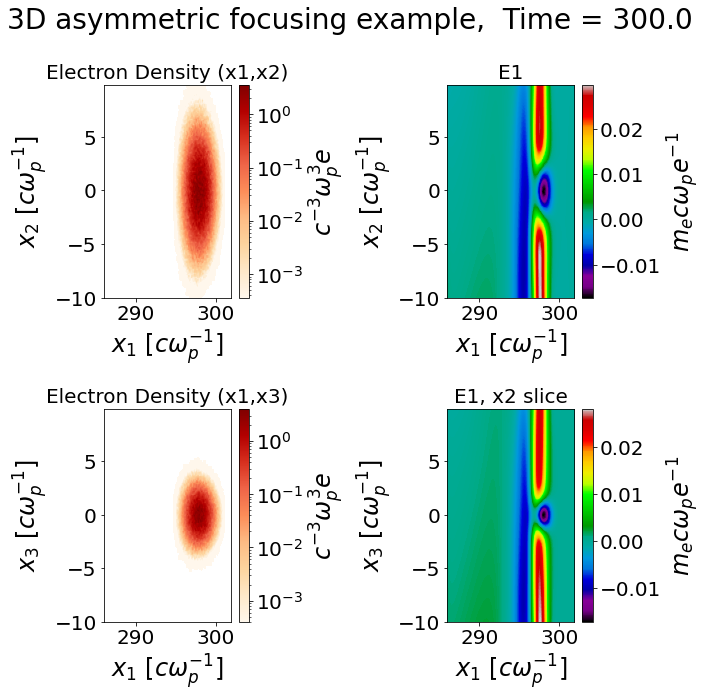

In [13]:
# Here we look at 3D asymmetric focusing
# t=100, beam is focused in the (x1,x2) plane
# t=200, beam is focused in the (x1,x3) plane
# t=300, beam is de-focused, slightly more so in the (x1,x2) plane

pwfa_3d_basic('/global/cscratch1/sd/tsung/focus-test-3d/MS/',10,show=True)
pwfa_3d_basic('/global/cscratch1/sd/tsung/focus-test-3d/MS/',20,show=True)
pwfa_3d_basic('/global/cscratch1/sd/tsung/focus-test-3d/MS/',30,show=True)

The third case is the most complicated and the most time consuming.  It comes from an injection paper by Thamine Daliaouch.  The description of the physics is as follows:

This input deck showcases injection triggered by self-focusing an electron driver in a constant density plasma. In this example, a 10 GeV driver with a peak current of 51 kA is focused (i.e., CS param $alpha_i \approx$ 0) to the entrance of the plasma with a transverse spot size of 1.225 $c/\omega_p$, normalized emittance of 24.5 $c/\omega_p$, and duration of 0.7 $c/\omega_p$. For these parameters, the driver is initially unmatched at the plasma entrance with $k_{\beta}\beta^* \approx 6.125$ and is therefore self-focused by the ion channel forces. During the first betatron oscillation ($ z \approx 400 c/\omega_p$), the plasma wake expands as the beam focuses and energetic sheath electrons are injected at the rear of the wake. Even though the spot size continues to oscillate, the wake remains nearly fully expanded after injection due to scalloping of the driver and beam loading. At $z =1630 c/\omega_p$, the energy distribution of the injected beam is flattened with an average energy of 1.86 GeV and low projected energy spread of $0.7\%$. This input deck uses a customized finite-difference solver to reduce numerical effects from the rapid rise in current due to injection. It also employs high fidelity grids with resolutions of $ 1/128 c/\omega_p$ in transverse and longitudinal directions. The simulations results can be found in Physical Review Accelerators and Beams 23, 021304 (2020).  The output below should match the results found in Figure 1(f) from the paper.

<img src="./figure1.png" alt="Drawing" style="width: 500px;"/>


To look at the data at z=1,630, run the simulation and run the 2 cells below:








In [19]:
# The final case is from Thamine's 2020 paper on injection.  

import math

def file_name_field(path,field,file_no):
    filename=path+'/FLD/'+field+'/'+field+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)
    
 
def file_name_phase(path,field,species,file_no):
    filename=path+'/PHA/'+field+'/'+species+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)

def file_name_density(path,field,species,file_no):
    filename=path+'/DENSITY/'+species+'/'+field+'/'+field+'-'+species+'-'+repr(file_no).zfill(6)+'.h5'
    # print(filename)
    return(filename)


def pwfa_test_basic(rundir,file_no,show=False,*args,**kwpassthrough):
    #
    #
        plasma_field_name = 'e1'
        laser_field_name = 'e2'
    #
    #
        species_1_name = 'electrons'


        electron_phase = file_name_phase(rundir,'p1x1',species_1_name,file_no)
        # electron_dist = file_name_phase(rundir,'p1p2',species_1_name,file_no)
        
        
        # ion_phase = file_name_phase(rundir,'p1x1',species_2_name,file_no)
        # ion_dist = file_name_phase(rundir,'p1p2',species_2_name,file_no)
        # ion_p2x1 = file_name_phase(rundir,'p2x1',species_2_name,file_no)
        
        
        # ion_density = file_name_density(rundir,'charge',species_2_name,file_no)
        electron_density = file_name_density(rundir,'charge',species_1_name,file_no)
        # ion_density_init = file_name_density(rundir,'charge',species_2_name,0)
        
        
        # b1=file_name_field(rundir,'b1',file_no)
        # b2=file_name_field(rundir,'b2',file_no)
        # b3=file_name_field(rundir,'b3',file_no)
        
        # b1_data=osh5io.read_h5(b1)
        # b2_data=osh5io.read_h5(b2)
        # b3_data=osh5io.read_h5(b3)
        
        # bsq=b1
        # bsq=(b1_data*b1_data+b2_data*b2_data+b3_data*b3_data)

        e1=file_name_field(rundir,'e1',file_no)
        e1_data=osh5io.read_h5(e1)
        # print(e1_data.run_attrs['TIME'][0])
        
        # electron_p1x1 = osh5io.read_h5(electron_phase)
        # electron_p1p2 = osh5io.read_h5(electron_dist)
        electron_rho = osh5io.read_h5(electron_density)
        
        # ion_p1x1 = osh5io.read_h5(ion_phase)
        # ion_p1p2 = osh5io.read_h5(ion_dist)
        # ion_phase_perp = osh5io.read_h5(ion_p2x1)
        
        # rho_i = osh5io.read_h5(ion_density)
        # rho_i_0 = osh5io.read_h5(ion_density_init)
   
        
      
        fig = plt.figure(figsize=(22,7.5) )
        fig.suptitle('Injection Example Time = '+repr(e1_data.run_attrs['TIME'][0]) )

                  
        electron_phase_plot = plt.subplot(121)
        # electron_p1x1=np.abs(electron_p1x1)
        # data_max=electron_p1x1.max()
        # osh5vis.osplot(electron_p1x1, title='Electron Phase Space (x1,p1)', *args,**kwpassthrough,
        #                norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/10000))
        electron_rho=np.abs(electron_rho)
        data_max=electron_rho.max()
        if(math.isnan(data_max)): data_max = 1.0
        # print(data_max)
        osh5vis.osplot(np.abs(electron_rho),title='Electron Density (x1,x2)',*args,**kwpassthrough,norm=matplotlib.colors.LogNorm(vmax=data_max,vmin=data_max/100000),cmap='Blues')
        # osh5vis.osplot(np.abs(electron_rho[0,:]),title='Electron Density (x1,x2)',*args,**kwpassthrough,ylim=[-1,0.2])

        
        electron_dist_plot = plt.subplot(122)
        
        
        osh5vis.osplot(e1_data, title='E1', *args,**kwpassthrough,cmap='nipy_spectral')
        
        if(show == True):
            plt.tight_layout()
            plt.show()
        else:
            print('saving file')
            fig.savefig(rundir+'/movie-'+repr(file_no).zfill(6)+'.png')
            plt.close(fig)
#


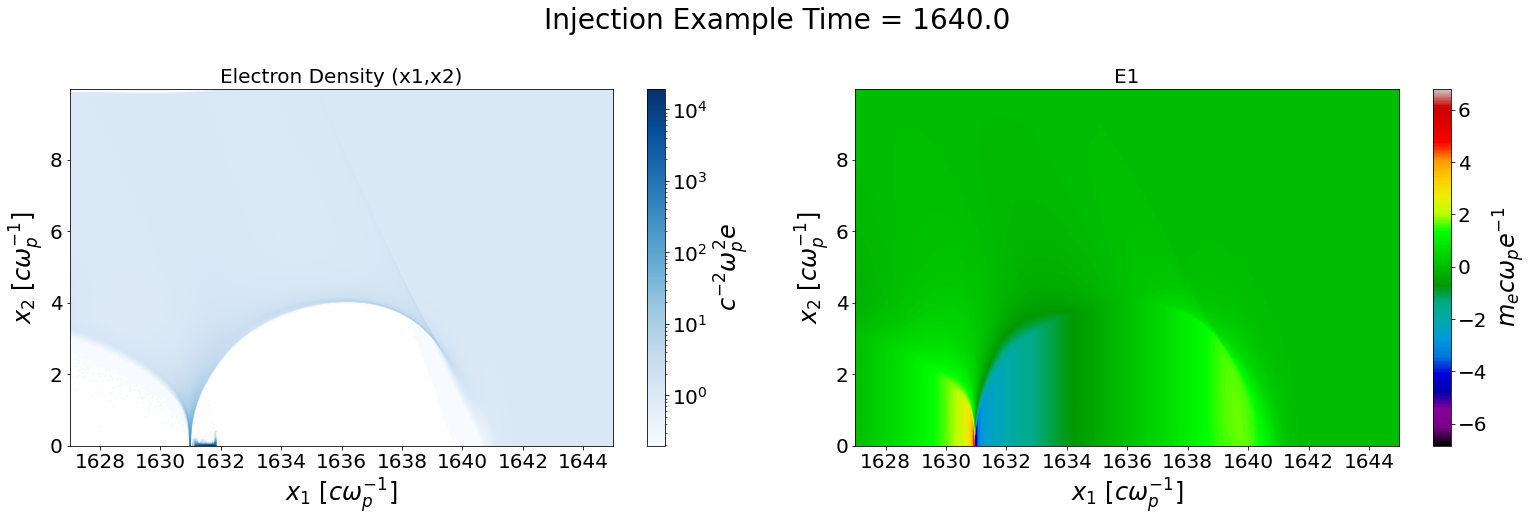

In [20]:

#pwfa_test_basic('/global/cscratch1/sd/tsung/os-os-test/MS/',55,show=True)
pwfa_test_basic('/global/cscratch1/sd/tsung/os-os-test/MS/',82,show=True)